<a href="https://colab.research.google.com/github/mabittar/Portfolio/blob/master/Panorama_do_COVID_19_no_Mundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19

A pandemia de Covid-19, causada pelo vírus SARS-CoV-2 ou Novo Coronavírus, vem produzindo repercussões em escala global, com impactos sociais, econômicos, políticos e culturais sem precedentes na história recente das epidemias.

<center><img alt="Colaboratory logo" width="50%" src="https://spectrum.ieee.org/image/MzU5MzU1Nw.jpeg"></center>

Nesse notebook pretendo criar um passo a passo de como utilizar um dataset com os dados de acompanhamento do site [World in Data](https://ourworldindata.org/) para explorar a evolução da pandemia pelo mundo.

## Obtenção dos Dados

Os dados são atualizados diariamente e incluem os casos confirmados, mortes, testes e outras variáveis de potencial interesse.

O repositório do GitHub do World in Data para os casos de Covid-19 pode ser acessado em: https://github.com/owid/covid-19-data/tree/master/public/data



### Importando os dados do COVID-19

* Você pode entrar no site [https://github.com/owid/covid-19-data/tree/master/public/data](https://github.com/owid/covid-19-data/tree/master/public/data) para conhecer a base dados. 

Usaremos o formato `csv` neste projeto.



In [1]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

from datetime import datetime, date
sns.set()

# importar o dataset COVID-19 para um DataFrame
data_path = 'https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv?raw=true'
df= pd.read_csv(data_path)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Análise Exploratória dos Dados

  Câmeras com inteligência artificial são capazes de identificar doenças de pele, programas estão sendo usados para análises laboratóriais auxiliando médicos e pacientes no tratamento das mais diversas doenças. Esses novos recursos permitem intervenções eficientes e eficazes.

  Essas novas ferramentas têm um ponto em comum ` a ciência de dados`.

  Cada vez mais dados das vitais, consultas médicas, exames laboratóriais são utilizados de forma sistemática. A partir da utilização desses dados a medicina vem ganhando novos capítulos, a ciência de dados está auxilando em tratamentos e diagnósticos. 



Para o nosso projeto, primeiramente vamos entender os dados que nos são apresentados.

### Análise Exploratória Inicial

####Identificando o Dataset

In [2]:
#Vamos ver as 5 primeiras linhas do nossos dados
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


####Verificando as demais dimensões do Dataset

In [3]:
# verificando as dimensões
print('Dimensões do Dataset',
    '\nVariáveis (colunas): ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

Dimensões do Dataset 
Variáveis (colunas):  34 
Entradas:  30011


####Detalhando as variáveis (colunas)

In [4]:
print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')


##### Dicionário de Variáveis

* iso_code - alpha-3
* continent - continente
* location - localização
* date - data
* total_cases - casos totais
* new_case - novos casos
* total_deaths - total de mortes
* new_deaths - novas mortes
* total_cases_per_million - total de casos por milhão de habitantes
* new_cases_per_million - novos casos por milhão de habitantes
* total_deaths_per_million - total de mortes por milhão de habitantes
* new_deaths_per_million - novas mortes por milhão de habitantes
* total_tests - total de testes
* new_tests - novos testes realizados
* total_tests_per_thousand  - total de testes por mil habitantes
* new_tests_per_thousand  - novos testes por mil habitantes
* new_tests_smoothed - novos testes ajustados
* new_tests_smoothed_per_thousand  - novos testes ajustados por mil habitantes
* tests_units - Unidades utilizadas por localização infomadas na data
* stringency_index - restrições
* population - população local
* population_density - densidade populacional
* median_age - idade média
* aged_65_older - acima de 65 anos de idade
* aged_70_older - acima de 70 anos de idade
* gdp_per_capita - PIB per capita
* extreme_poverty - porcentagem da população vivendo em extrema pobreza
* cvd_death_rate - taxa de mortes por doenças cardiovasculares
* diabetes_prevalence - casos de diabete (% da poupulação entre 20 e 79 anos)
* female_smokers - número de fumantes (mulheres)
* male_smokers - número de fumantes (homens)
* handwashing_facilities - % da população com acesso a higiene básica
* hospital_beds_per_thousand - leitos hospitalares por mil habitantes
* life_expectancy - expectativa de vida

mais informações sobre as variáveis pode ser consultado no repositório oficial no [GitHub](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data-codebook.md).

####Tipo de variáveis
Como as variáveis (colunas) estão configuradas:

In [5]:
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

##### Corrindo as variáveis

A coluna Date está com o formato diferente do necessário, para corrigi-lo usamos o comando `pd.to_datetime()`.

Vamos aproveitar para criar uma coluna com os números das semanas, pois irá auxiliar na elaboração dos gráficos de avanço.

In [6]:
#converter object to datetime
df.date = pd.to_datetime(df.date)

In [7]:
#criar uma coluna e obter o número da semana
df['week_number'] = df['date'].dt.week

Vamos criar também um coluna que nos mostre a letalidade da pandemia:

In [24]:
df['letalidade'] = df['new_deaths'] / df['new_cases']

#### Identificando variáveis ausentes



Para identificar a porcentagem de valores ausentes nas colunas usamos:

In [25]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False).head(7)

new_tests                          0.709373
new_tests_per_thousand             0.709373
total_tests                        0.696111
total_tests_per_thousand           0.696111
new_tests_smoothed_per_thousand    0.670154
new_tests_smoothed                 0.670154
tests_units                        0.646996
dtype: float64

Podemos ver que as colunas em relação aos testes realizados são os principais itens ausentes no nosso dataset.
A fonte de dados são os órgão governamentais e portanto esses números não estão sendo corretamente divulgados.

### Comparando os Dados

#### Mais Casos Reportados
Vamos verificar os países com mais casos reportados na data mais recente:


In [26]:
#identificando a data mais recente no nosso dataset:
data_recente = df['date'].max()
print_recente = np.datetime64(data_recente, 'D')
print("última atualização em {}." .format(print_recente))

última atualização em 2020-07-13.


In [27]:
print("A classificação dos países com mais casos de Covid-19 em {} é:".format(print_recente))

#usando a função .loc para restringir a pesquisa na data mais recente  ordernar os valores por total de casos
df_total_cases = df.loc[df.date == data_recente].sort_values(by="total_cases", ascending=False)
df_total_cases.iloc[1:6,]

A classificação dos países com mais casos de Covid-19 em 2020-07-13 é:


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,week_number,letalidade
28555,USA,North America,United States,2020-07-13,3304942.0,57258.0,135205.0,391.0,9984.639,172.984,408.471,1.181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,29,0.006829
4048,BRA,South America,Brazil,2020-07-13,1864681.0,24831.0,72100.0,631.0,8772.517,116.819,339.199,2.969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,29,0.025412
12724,IND,Asia,India,2020-07-13,878254.0,28701.0,23174.0,500.0,636.414,20.798,16.793,0.362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,29,0.017421
22659,RUS,Europe,Russia,2020-07-13,727162.0,6615.0,11335.0,130.0,4982.798,45.329,77.672,0.891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,29,0.019652
21511,PER,South America,Peru,2020-07-13,326326.0,3616.0,11870.0,188.0,9897.110,109.669,360.004,5.702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.7,3.297185e+07,25.129,29.1,7.151,4.455,12236.706,3.5,85.755,5.95,4.8,NaN,NaN,1.60,76.74,29,0.051991


#### Mais Casos Reportados normalizando a população
Vamos verificar quais países que confirmaram mais de 1.000 casos confirmados, utilizando os dados parametrizados (total de casos por milhão de habitantes).

In [28]:
print("Os países que apresentaram mais de 1.000 casos confirmados, normalizando a contagem de casos por milhão de habitantes em {} é:".format(print_recente))
df_total_cases_per_million = df.loc[df.date == data_recente].sort_values(by="total_cases_per_million", ascending=False)
df_total_cases_per_million = df_total_cases_per_million.loc[df_total_cases_per_million.total_cases >= 1000].sort_values(by="total_cases_per_million", ascending=False)
df_total_cases_per_million.iloc[1:6,]

Os países que apresentaram mais de 1.000 casos confirmados, normalizando a contagem de casos por milhão de habitantes em 2020-07-13 é:


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,week_number,letalidade
2287,BHR,Asia,Bahrain,2020-07-13,32941.0,471.0,109.0,5.0,19359.032,276.801,64.058,2.938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1701583.0,1935.907,32.4,2.372,1.387,43290.705,NaN,151.689,16.52,5.8,37.6,NaN,2.00,77.29,29,0.010616
5739,CHL,South America,Chile,2020-07-13,315041.0,3012.0,6979.0,98.0,16480.307,157.563,365.083,5.127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19116209.0,24.282,35.4,11.087,6.938,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.11,80.18,29,0.032537
15130,KWT,Asia,Kuwait,2020-07-13,54894.0,836.0,390.0,4.0,12854.043,195.759,91.323,0.937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4270563.0,232.128,33.7,2.345,1.114,65530.537,NaN,132.235,15.84,2.7,37.0,NaN,2.00,75.49,29,0.004785
20690,OMN,Asia,Oman,2020-07-13,56015.0,1318.0,257.0,9.0,10969.091,258.096,50.327,1.762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5106622.0,14.980,30.7,2.355,1.530,37960.709,NaN,266.342,12.61,0.5,15.6,97.400,1.60,77.86,29,0.006829
1280,ARM,Asia,Armenia,2020-07-13,31969.0,577.0,565.0,6.0,10788.551,194.720,190.670,2.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2963234.0,102.931,35.7,11.232,7.571,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09,29,0.010399


#### Mais Mortes Reportadas
Agora vamos verificar os países com mais mortes reportados na data mais recente:


In [29]:
print("A classificação dos países com mais mortes de Covid-19 em {} é:".format(print_recente))
df_total_deaths = df.loc[df.date == data_recente].sort_values(by="total_deaths", ascending=False)
df_total_deaths.iloc[1:6,]

A classificação dos países com mais mortes de Covid-19 em 2020-07-13 é:


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,week_number,letalidade
28555,USA,North America,United States,2020-07-13,3304942.0,57258.0,135205.0,391.0,9984.639,172.984,408.471,1.181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,29,0.006829
4048,BRA,South America,Brazil,2020-07-13,1864681.0,24831.0,72100.0,631.0,8772.517,116.819,339.199,2.969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,29,0.025412
28359,GBR,Europe,United Kingdom,2020-07-13,289603.0,650.0,44819.0,21.0,4266.019,9.575,660.210,0.309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,29,0.032308
17914,MEX,North America,Mexico,2020-07-13,299750.0,4482.0,35006.0,276.0,2324.855,34.762,271.506,2.141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,29,0.061580
14004,ITA,Europe,Italy,2020-07-13,243061.0,234.0,34954.0,9.0,4020.074,3.870,578.117,0.149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60461828.0,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,29,0.038462


### Visualização Gráfica dos Dados

#### Mais Casos Reportados

Para plotar um gráfico de barras para os 5 países com mais casos na data mais recente:

Observação: aqui vamos usar o dataset *df_total_cases* criado na iteração anterior, pois já temos organizados os países com mais casos. Utilizamos o `.iloc[1:6,]` para retornar as primeiras linhas excluindo a linha 0, pois é o resultado acumulado para o mundo.

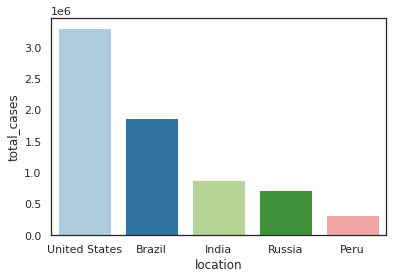

In [30]:
sns.barplot(x='location', y='total_cases', data=df_total_cases.iloc[1:6,], palette="Paired");

Podemos ainda incrementar o gráfico, adicionando estilo, cores, título e nomes aos eixos.

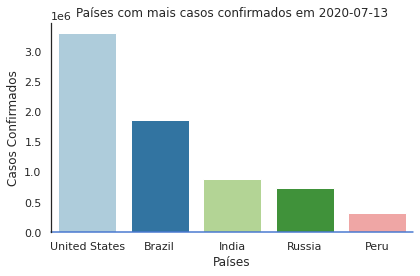

In [31]:
#definir o estilo
sns.set(style="white", palette="muted", color_codes=True)

#criar o objeto gráfico
f, ax1 = plt.subplots()

#Gráfico com mais casos (aqui excluimos a linha mundo usando a fórmula .iloc[1:6,])
sns.barplot(x='location', y='total_cases', data=df_total_cases.iloc[1:6,], palette="Paired", ax=ax1)
ax1.axhline(0, clip_on=False)

#Definindo título e nomes aos eixos
ax1.set_title("Países com mais casos confirmados em {}" .format(print_recente))
ax1.set_ylabel("Casos Confirmados")
ax1.set_xlabel("Países")

#Finalizando os Gráficos
sns.despine(bottom=True)
plt.tight_layout()

#### Mais Casos Reportados normalizando a população

Para plotar um gráfico de barras para os 5 países com mais casos por milhão de habitantes usamos:

Observação: aqui vamos usar o dataset *df_total_cases_per_million* criado na iteração anterior, pois já temos organizados os países com mais casos. Utilizamos o `.iloc[1:6,]` para retornar as primeiras linhas excluindo a linha 0, pois é o resultado acumulado para o mundo.

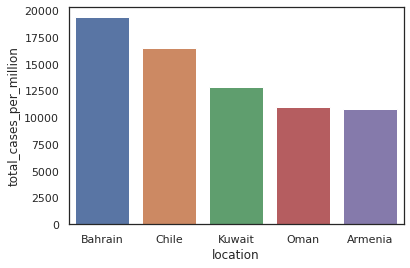

In [32]:
sns.barplot(x='location', y='total_cases_per_million', data=df_total_cases_per_million.iloc[1:6,], palette="deep");

#### Mais Mortes Reportadas

Podemos ainda elaborar um gráfico que nos mostre os 5 países com mais mortes registradas

Observação: aqui vamos usar o dataset *df_total_deaths* criado na iteração anterior, pois já temos organizados os países com mai casos. Utilizamos o `.iloc[1:6,]` para retornar as primeiras linhas excluindo a linha 0, pois é o resultado acumulado para o mundo.

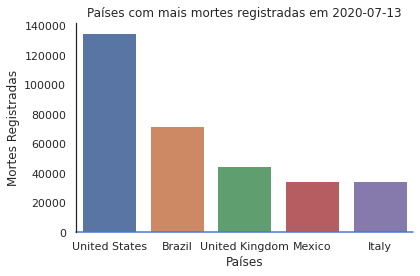

In [33]:
#definir o estilo
sns.set(style="white", palette="muted", color_codes=True)

f, ax2 = plt.subplots()

#segundo Gráfico com mais mortes
sns.barplot(x='location', y='total_deaths', data=df_total_deaths.iloc[1:6,], palette="deep", ax=ax2)
ax2.axhline(0, clip_on=False)
ax2.set_title("Países com mais mortes registradas em {}" .format(print_recente))
ax2.set_ylabel("Mortes Registradas")
ax2.set_xlabel("Países")

#Finalizando os Gráficos
sns.despine(bottom=True)
plt.tight_layout()

## Escolha o País para verificar os dados

In [34]:
#primeiro vamos criar uma lista de países:
location = df['location'].drop_duplicates().sort_values(ascending=True).tolist()
print(location)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',

Aqui devemos utilizar o nome do país em inglês, pois é a linguagem da base de dados!!!

In [35]:
#@title Escolha o País para obter um resumo dos dados disponível: {run: "auto"}

escolha_o_pais = 'World' #@param ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'International', 'Iran', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macedonia', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Somalia', 'South Africa', 'South Korea', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Swaziland', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor', 'Togo', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turks and Caicos Islands', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'United States Virgin Islands', 'Uruguay', 'Uzbekistan', 'Vatican', 'Venezuela', 'Vietnam', 'Western Sahara', 'World', 'Yemen', 'Zambia', 'Zimbabwe']

# imprimir os valores dos formulários
print("Acompanhe a evolução dos casos para {}." .format(escolha_o_pais))
df_search = df.loc[df.location == escolha_o_pais].copy()


Acompanhe a evolução dos casos para World.


### Primeiros registros

A partir do país escolhido quando foi registrada a primeira morte?

In [36]:
#procura no dataset df_search quando os casos superaram 0 (!= não)
first_death = df_search.loc[df_search['new_deaths'] != 0.0].head(1)
#retorna o valor do item na coluna date
first_date = first_death['date'].item()
#transforma o valor obtido na iteração anteior em data
first_date = np.datetime64(first_date, 'D')
print("A primeira morte foi registrada em {}." .format(first_date))


A primeira morte foi registrada em 2020-01-11.


Em qual semana foi registrado a primeira morte? Qual o maior número de novos casos que o país selecionado registrou em uma semana?

In [37]:
#retorna o valor da semana onde ocorreu a primeira morte, com base na primeira iteração
first_week = first_death['week_number'].item()
print("A primeira semana onde foi regisrado uma morte foi a semana número {}. ".format (first_week))
#retorna o valor da última coluna do dataset
max_week = df_search['week_number'].max()
#retorna o maior numero de novos casos
max_casos = df_search['new_cases'].max()
print("O maior número de casos registrados em uma semana é {:,.0f}. ".format (max_casos))

A primeira semana onde foi regisrado uma morte foi a semana número 2. 
O maior número de casos registrados em uma semana é 229,759. 


### Novos Casos por Semana

Como os novos casos estão distribuídos nas semanas? A primeiras semanas registraram mais casos? A velocidade de registro de novos casos está diminuindo?

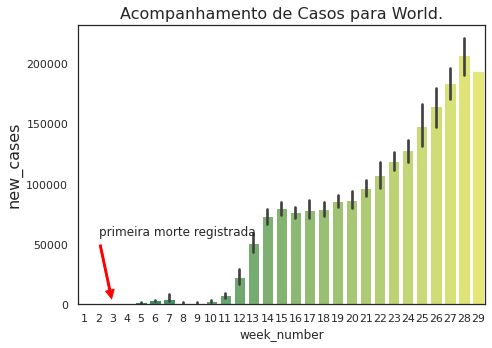

In [38]:
plt.close()
#definir o estilo
sns.set(style="white", color_codes=True)
#criar o objeto gráfico
fig, ax4 = plt.subplots(figsize=(7, 5))
#definir título e nome do eixo
ax4.set_title("Acompanhamento de Casos para {}." .format(escolha_o_pais), fontsize=16)
ax4.set_ylabel('Novos Casos', fontsize=16)
#dados para o grafico de barra barplot
ax4 = sns.barplot(x='week_number', y='new_cases', data=df_search, palette='summer')


#adicionar seta na semana onde foi registrada a primeira morte
ax4.annotate('primeira morte registrada', xy=(first_week, 2), xytext=(1, first_week+(max_casos/4)),
            arrowprops=dict(facecolor='red', shrink=0.05))
fig.tight_layout();


### Casos Totais
Como o resgistro total de casos está evoluindo?

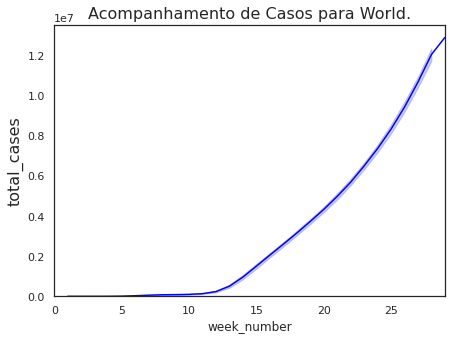

In [41]:
plt.close()
#definir o estilo
sns.set(style="white", color_codes=True)
#criar o objeto gráfico
fig, ax5 = plt.subplots(figsize=(7, 5))
#definir título e nome do eixo
ax5.set_title("Acompanhamento de Casos para {}." .format(escolha_o_pais), fontsize=16)
ax5.set_ylabel('Total de Casos', fontsize=16)
#dados para o grafico de linha lineplot
ax5 = sns.lineplot(x='week_number', y='total_cases', data = df_search, sort=False, color= 'blue')
#define os valores iniciais e finais dos eixos
ax5.set_xlim(0, max_week)
ax5.set_ylim(0,)
#show plot
plt.show();


### Novos Casos x Casos acumulados

Sobrepondo os dois gráficos anteiores, podemos verificar como a evolução do registro de novos casos está impactando o total de casos acumulado. E podemos ainda analisar se o número de infectados está acelerando ou reduzindo a velocidade de contágio.

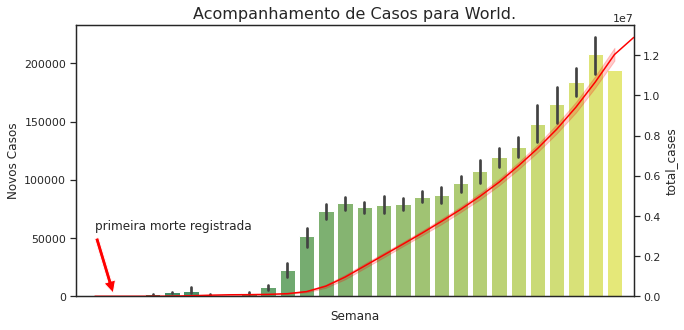

In [42]:
plt.close()
#criar o objeto gráfico
f, ax8 = plt.subplots(figsize=(10, 5))
#dados para o gráfico de barra barplot
ax8 = sns.barplot(x='week_number', y='new_cases', data=df_search, palette='summer') #define os dados para o gráfico de barra
ax8.set_xlim(0,)

#adicionar anotação da primeira morte registrada
#no campo xy=(,) indica as coordenadas onde a seta começa, no campo xytext=(,) indica as coordenadas onde o texto começa e termina a seta
ax8.annotate('primeira morte registrada', xy=(first_week, 2), xytext=(1, first_week+(max_casos/4)),
            arrowprops=dict(facecolor='red', shrink=0.05)) 


ax9 = ax8.twinx() #passamos a informação que o eixo x é o mesmo e utilizaremos um eixo y secundário
# dados para o gráfico de linha
sns.lineplot(x='week_number', y='total_cases', data = df_search, ax=ax9, color="red")
#define os valores iniciais e finais dos eixos
ax9.set_xlim(0, max_week)
ax9.set_ylim(0,)

#definir título e nome dos eixos
ax8.set_title("Acompanhamento de Casos para {}." .format(escolha_o_pais), fontsize=16)#define os dados para o gráfico de linha
ax8.set_ylabel("Novos Casos")
ax8.set_xlabel("Semana")

#apagar o número da semana do eixo x
ax8.xaxis.set_major_formatter(plt.NullFormatter())

plt.show()

### Letalidade

Utilizando a variável criada anteriorente, podemos verificar como a letalidade da pandemia está evoluindo:

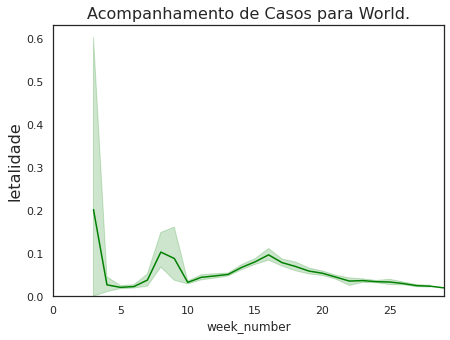

In [43]:
plt.close()
#definir o estilo
sns.set(style="white", color_codes=True)
#criar o objeto gráfico
fig, ax5 = plt.subplots(figsize=(7, 5))
#definir título e nome do eixo
ax5.set_title("Acompanhamento de Casos para {}." .format(escolha_o_pais), fontsize=16)
ax5.set_ylabel('Total de Casos', fontsize=16)
#dados para o grafico de linha lineplot
ax5 = sns.lineplot(x='week_number', y='letalidade', data = df_search, sort=False, color= 'green')
#define os valores iniciais e finais dos eixos
ax5.set_xlim(0, max_week)
ax5.set_ylim(0,)
#show plot
plt.show();
plt.close()

## Conclusão

Um detalhe extremamente importante a ser destacado é que esses dados são medidos diariamente, e esse conjunto de dados ficará desatualizado "rapidamente".

Entretanto, levando em consideração o contexto dos dados analisados na primeira parte desse notebook, vale a pena destacar que:

* Os Estados Unidos estão disparados em relação aos casos e mortes.
* A evolução dos casos no Brasil está em crescimento.
* No geral, casos e mortes ainda estão crescendo.
* A letalidade da pandemia foi maior nas primeiras semanas e hoje encontra-se em uma curva decrescente.

Muitas outras análises podem ser retiradas desse conjunto de dados, mas com essa análise inicial já conseguimos retirar muitas informações.

Como parte da provocação feita no curso de **Data Science na Prática** fui desafiado explorar os dados disponível e explicar os passos dessa análise.
Se você ficou interessado no curso pode obter mais informações em:

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  